In [128]:
from classiq import *

@qfunc
def main(cntrl: Output[QArray[QBit]], target: Output[QBit]) -> None:
    allocate(20, cntrl)
    allocate(1, target)
    control(ctrl=cntrl, operand=lambda: X(target))

In [129]:
quantum_model = create_model(main)

In [130]:
width =25
quantum_model_with_constraints = set_constraints(quantum_model, Constraints(optimization_parameter="depth",max_width=width))
quantum_program = synthesize(quantum_model_with_constraints)
circuit_width = QuantumProgram.from_qprog(quantum_program).data.width
circuit_depth = QuantumProgram.from_qprog(quantum_program).transpiled_circuit
gates = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.count_ops
# gates_value = gates.values()
# reslut = {"min_width":circuit_width,
#           "depth":circuit_depth,
#           "total_gates": sum(gates_value)
#          }
# print(reslut)
print()

In [131]:
def minimai_width_optimization():
    quantum_model_with_constraints = set_constraints(quantum_model, Constraints(optimization_parameter="width"))
    quantum_program = synthesize(quantum_model_with_constraints)
    circuit_width = QuantumProgram.from_qprog(quantum_program).data.width
    circuit_depth = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth
    gates = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.count_ops
    gates_value = gates.values()
    result = {"w":circuit_width,
              "d":circuit_depth,
              "Gates": sum(gates_value)
             }
    return result

In [132]:
def minimai_depth_optimization():
    quantum_model_with_constraints = set_constraints(quantum_model, Constraints(optimization_parameter="depth"))
    quantum_program = synthesize(quantum_model_with_constraints)
    circuit_width = QuantumProgram.from_qprog(quantum_program).data.width
    circuit_depth = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth
    gates = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.count_ops
    gates_value = gates.values()
    result = {"w":circuit_width,
              "d":circuit_depth,
              "Gates": sum(gates_value)
             }
    return result


In [133]:
def width_depth_optimization(width):
    quantum_model_with_constraints = set_constraints(quantum_model, Constraints(optimization_parameter="depth",max_width=width))
    quantum_program = synthesize(quantum_model_with_constraints)
    program_width = QuantumProgram.from_qprog(quantum_program).data.width
    # program_depth = QuantumProgram.from_qprog(quantum_program).data.depth
    transpiled_depth = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth
    gates = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.count_ops
    gates_value = gates.values()
    result = {"w":program_width,
              "tran_d":transpiled_depth,
              "Gates": sum(gates_value)
             }
    return result

In [134]:
width_depth_optimization(25)

{'w': 25, 'tran_d': 893, 'Gates': 1422}

In [ ]:
w=[]
d=[]
Gates=[]
for i in range(22, 31):
  # Your code to be executed for each iteration
    result = width_depth_optimization(i)
    w.append(result['w'])
    d.append(result['tran_d'])
    Gates.append(result['Gates'])
print(w)
print(d)
print(Gates)
    

In [125]:
# my_dict = {}
# for i, num in enumerate(range(22, 31)):  # Start range from 20
#     if num == 22:
#         num = f"mini_width_{num}"
#         my_dict[num] = minimai_width_optimization()
#     elif num == 30:
#         num = f"max_width_{num}"
#         my_dict[num] = minimai_depth_optimization()
#     else:
#         print(i)
#         my_dict[num] = width_depth_optimization(i)
#         # my_dict[num] = width_depth_optimization(i)

# # Print the dictionary
# print(my_dict)

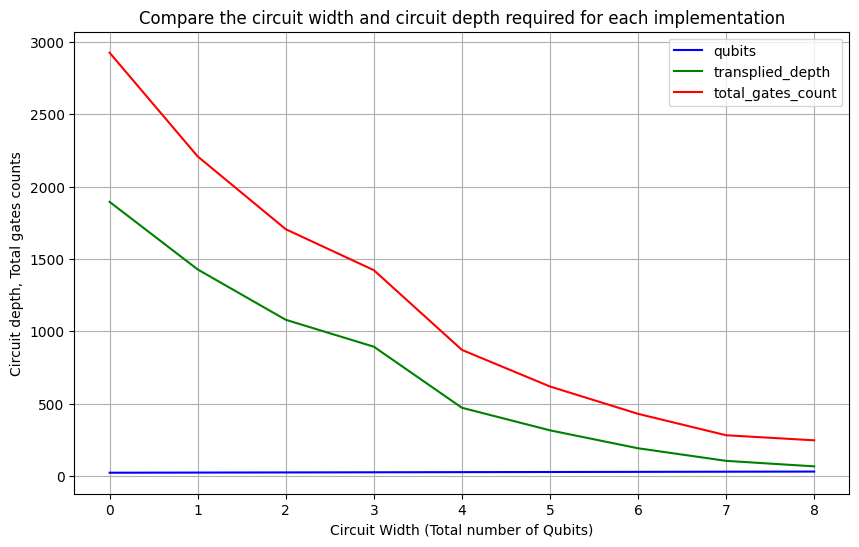

In [145]:
import matplotlib.pyplot as plt

qubits = [22, 23, 24, 25, 26, 27, 28, 29, 30]
transplied_depth = [1894, 1427, 1079, 893, 471, 315, 191, 104, 66]
total_gates_count = [2925, 2208, 1705, 1422, 871, 618, 429, 281, 246]

# Define labels and colors for each dataset
labels = ["qubits", "transplied_depth", "total_gates_count"]
colors = ['b', 'g', 'r']  # Blue, green, red

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot each dataset with its corresponding color and label
for i, data in enumerate(zip(labels, colors, [qubits, transplied_depth, total_gates_count])):
  label, color, data = data
  plt.plot(data, label=label, color=color)

# Add labels and title
plt.xlabel("Circuit Width (Total number of Qubits)")
plt.ylabel("Circuit depth, Total gates counts")
plt.title("Compare the circuit width and circuit depth required for each implementation")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add gridlines
plt.show()

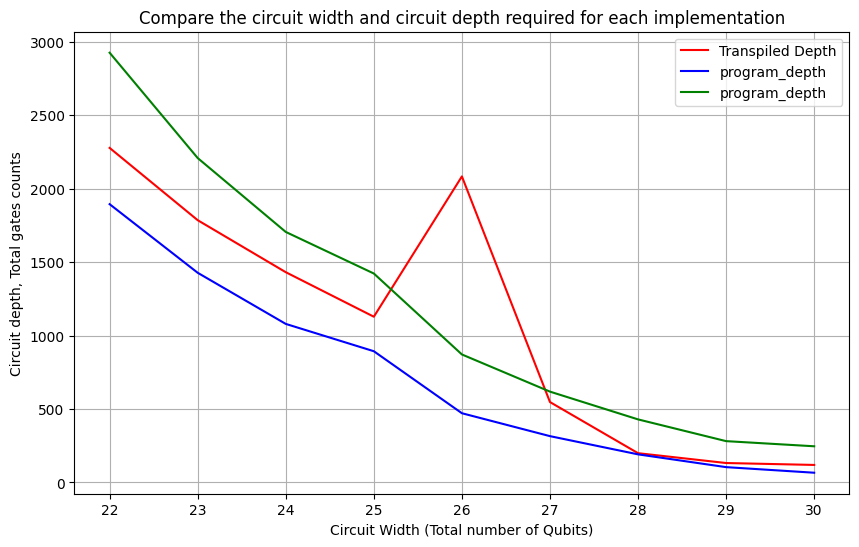

In [148]:
import matplotlib.pyplot as plt

# Data lists
qubits = [22, 23, 24, 25, 26, 27, 28, 29, 30]
program_depth = [2277, 1785, 1431, 1128, 2083, 547, 199, 132, 119]
transpiled_depth = [1894, 1427, 1079, 893, 471, 315, 191, 104, 66]
transpiled_depth = [1894, 1427, 1079, 893, 471, 315, 191, 104, 66]
total_gates_count = [2925, 2208, 1705, 1422, 871, 618, 429, 281, 246]

# Define labels for each dataset
dataset_labels = ["Transpiled Depth", "Total Gates Count","program_depth"]

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot Transpiled Depth (using red line)
plt.plot(qubits, program_depth, label=dataset_labels[0], color='r')

# Plot Transpiled Depth (using blue line)
plt.plot(qubits, transpiled_depth, label=dataset_labels[2], color='b')

# Plot Total Gates Count (using green line)
plt.plot(qubits, total_gates_count, label=dataset_labels[2], color='g')

# Add labels and title
plt.xlabel("Circuit Width (Total number of Qubits)")
plt.ylabel("Circuit depth, Total gates counts")
plt.title("Compare the circuit width and circuit depth required for each implementation")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Optional: Add gridlines
plt.show()

In [ ]:
#####

In [13]:
job = execute(quantum_program)
results = job.result()[0].value.parsed_counts
print(results)

[{'cntrl': 0.0, 'target': 0.0}: 2048]
